In this project, we are working on data about **New York City public schools**. One of the most controversial issues in the U.S. educational system is the efficacy of standardized tests, and whether they're unfair to certain groups.

Our job is to analyze if there is any biasness in **Scholastic Aptitude Test (SAT)**

In [1]:
import pandas as pd
import os
os.environ['PROJ_LIB'] = 'C:\ProgramData\Anaconda3\share'
from mpl_toolkits.basemap import Basemap

files = ["ap_2010.csv","class_size.csv","demographics.csv","graduation.csv",
         "hs_directory.csv","sat_results.csv"]

data = {}
for file in files:
    # df = pd.read_csv(f"school/{file}")
    df = pd.read_csv("school/{0}".format(file), )
    key = file.replace(".csv","")
    data[key] = df


In [2]:
data.keys()

dict_keys(['ap_2010', 'class_size', 'demographics', 'graduation', 'hs_directory', 'sat_results'])

In [3]:
data['sat_results'].head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


In [4]:
# pd.read_table("school/survey_all.txt", encoding = "latin-1")

In [5]:
all_survey = pd.read_csv("school/survey_all.txt", encoding = "latin-1",
                         delimiter = "\t")

In [6]:
d75_survey = pd.read_csv("school/survey_d75.txt", encoding = "latin-1",
                         delimiter = "\t")

In [7]:
survey = pd.concat([all_survey, d75_survey], axis = "index", ignore_index= True)

In [8]:
survey.shape

(1702, 2773)

In [9]:
survey.columns

Index(['dbn', 'bn', 'schoolname', 'd75', 'studentssurveyed', 'highschool',
       'schooltype', 'rr_s', 'rr_t', 'rr_p',
       ...
       's_q14_2', 's_q14_3', 's_q14_4', 's_q14_5', 's_q14_6', 's_q14_7',
       's_q14_8', 's_q14_9', 's_q14_10', 's_q14_11'],
      dtype='object', length=2773)

In [10]:
survey.columns = survey.columns.str.replace("dbn", "DBN")

In [11]:
survey.columns

Index(['DBN', 'bn', 'schoolname', 'd75', 'studentssurveyed', 'highschool',
       'schooltype', 'rr_s', 'rr_t', 'rr_p',
       ...
       's_q14_2', 's_q14_3', 's_q14_4', 's_q14_5', 's_q14_6', 's_q14_7',
       's_q14_8', 's_q14_9', 's_q14_10', 's_q14_11'],
      dtype='object', length=2773)

In [12]:
survey_fields = ["DBN", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", 
        "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11", "eng_t_11", 
        "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", "saf_tot_11", 
        "com_tot_11", "eng_tot_11", "aca_tot_11"]



In [13]:
survey = survey[survey_fields]

In [14]:
data["survey"] = survey

In [15]:
data.keys()

dict_keys(['ap_2010', 'class_size', 'demographics', 'graduation', 'hs_directory', 'sat_results', 'survey'])

In [16]:
data["ap_2010"].head()

,DBN,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
0,01M448,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,10.0
1,01M450,EAST SIDE COMMUNITY HS,19.0,21.0,NaN
2,01M515,LOWER EASTSIDE PREP,24.0,26.0,24.0
3,01M539,"NEW EXPLORATIONS SCI,TECH,MATH",255.0,377.0,191.0
4,02M296,High School of Hospitality Management,NaN,NaN,NaN


In [17]:
data["ap_2010"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   DBN                                   258 non-null    object 
 1   SchoolName                            258 non-null    object 
 2   AP Test Takers                        233 non-null    float64
 3   Total Exams Taken                     233 non-null    float64
 4   Number of Exams with scores 3 4 or 5  151 non-null    float64
dtypes: float64(3), object(2)
memory usage: 10.2+ KB


In [18]:
len(data["ap_2010"]["DBN"].unique())

257

In [19]:
data["sat_results"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   DBN                              478 non-null    object
 1   SCHOOL NAME                      478 non-null    object
 2   Num of SAT Test Takers           478 non-null    object
 3   SAT Critical Reading Avg. Score  478 non-null    object
 4   SAT Math Avg. Score              478 non-null    object
 5   SAT Writing Avg. Score           478 non-null    object
dtypes: object(6)
memory usage: 22.5+ KB


In [20]:
len(data["sat_results"]["DBN"].unique())

478

In [21]:
data["ap_2010"]["DBN"].value_counts()

04M610    2
14K474    1
28Q440    1
14K322    1
11X249    1
         ..
31R605    1
07X500    1
09X239    1
11X288    1
02M459    1
Name: DBN, Length: 257, dtype: int64

In [22]:
ap_dbn = data["ap_2010"]["DBN"]
bol = ap_dbn == "04M610"

data["ap_2010"][bol]

,DBN,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
51,04M610,THE YOUNG WOMEN'S LEADERSHIP SCHOOL OF EAST HA...,41.0,55.0,29.0
52,04M610,YOUNG WOMEN'S LEADERSHIP SCH,NaN,NaN,NaN


In [23]:
pd.options.display.max_colwidth = None

data["ap_2010"][bol]

,DBN,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
51,04M610,THE YOUNG WOMEN'S LEADERSHIP SCHOOL OF EAST HARLEM,41.0,55.0,29.0
52,04M610,YOUNG WOMEN'S LEADERSHIP SCH,NaN,NaN,NaN


In [24]:
data["ap_2010"].drop(52, axis = 0, inplace = True)

In [25]:
data["ap_2010"].shape

(257, 5)

In [26]:
data["ap_2010"].iloc[52]

DBN                                                    05M304
SchoolName                              Mott Hall High School
AP Test Takers                                             11
Total Exams Taken                                          11
Number of Exams with scores 3 4 or 5                      NaN
Name: 53, dtype: object

In [27]:
data["ap_2010"].iloc[52]

DBN                                                    05M304
SchoolName                              Mott Hall High School
AP Test Takers                                             11
Total Exams Taken                                          11
Number of Exams with scores 3 4 or 5                      NaN
Name: 53, dtype: object

In [28]:
# data["ap_2010"]["DBN"].value_counts()

In [29]:
data["ap_2010"].head()

,DBN,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
0,01M448,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,10.0
1,01M450,EAST SIDE COMMUNITY HS,19.0,21.0,NaN
2,01M515,LOWER EASTSIDE PREP,24.0,26.0,24.0
3,01M539,"NEW EXPLORATIONS SCI,TECH,MATH",255.0,377.0,191.0
4,02M296,High School of Hospitality Management,NaN,NaN,NaN


In [30]:
data.keys()

dict_keys(['ap_2010', 'class_size', 'demographics', 'graduation', 'hs_directory', 'sat_results', 'survey'])

In [31]:
data['class_size'].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN


In [32]:
data['class_size'].columns

Index(['CSD', 'BOROUGH', 'SCHOOL CODE', 'SCHOOL NAME', 'GRADE ',
       'PROGRAM TYPE', 'CORE SUBJECT (MS CORE and 9-12 ONLY)',
       'CORE COURSE (MS CORE and 9-12 ONLY)', 'SERVICE CATEGORY(K-9* ONLY)',
       'NUMBER OF STUDENTS / SEATS FILLED', 'NUMBER OF SECTIONS',
       'AVERAGE CLASS SIZE', 'SIZE OF SMALLEST CLASS', 'SIZE OF LARGEST CLASS',
       'DATA SOURCE', 'SCHOOLWIDE PUPIL-TEACHER RATIO'],
      dtype='object')

In [33]:
data['class_size']["SCHOOL CODE"].value_counts()

K429    57
X505    56
X517    56
K448    52
K690    52
        ..
Q290     3
K534     3
X090     2
M267     2
Q465     2
Name: SCHOOL CODE, Length: 1487, dtype: int64

In [34]:
data['class_size'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27611 entries, 0 to 27610
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   CSD                                   27611 non-null  int64  
 1   BOROUGH                               27611 non-null  object 
 2   SCHOOL CODE                           27611 non-null  object 
 3   SCHOOL NAME                           27611 non-null  object 
 4   GRADE                                 26127 non-null  object 
 5   PROGRAM TYPE                          26127 non-null  object 
 6   CORE SUBJECT (MS CORE and 9-12 ONLY)  26127 non-null  object 
 7   CORE COURSE (MS CORE and 9-12 ONLY)   26127 non-null  object 
 8   SERVICE CATEGORY(K-9* ONLY)           26127 non-null  object 
 9   NUMBER OF STUDENTS / SEATS FILLED     26127 non-null  float64
 10  NUMBER OF SECTIONS                    26127 non-null  float64
 11  AVERAGE CLASS S

In [35]:
class_s = data['class_size']

In [36]:
class_s["CSD"].head()

0    1
1    1
2    1
3    1
4    1
Name: CSD, dtype: int64

In [37]:
"0" + class_s["CSD"].astype(str)

0         01
1         01
2         01
3         01
4         01
        ... 
27606    032
27607    032
27608    032
27609    032
27610    032
Name: CSD, Length: 27611, dtype: object

In [38]:
data['sat_results']["DBN"].unique()

array(['01M292', '01M448', '01M450', '01M458', '01M509', '01M515',
       '01M539', '01M650', '01M696', '02M047', '02M288', '02M294',
       '02M296', '02M298', '02M300', '02M303', '02M305', '02M308',
       '02M313', '02M316', '02M374', '02M376', '02M392', '02M393',
       '02M394', '02M399', '02M400', '02M407', '02M408', '02M411',
       '02M412', '02M413', '02M414', '02M416', '02M418', '02M419',
       '02M420', '02M425', '02M427', '02M429', '02M437', '02M438',
       '02M439', '02M440', '02M449', '02M459', '02M460', '02M473',
       '02M475', '02M489', '02M500', '02M519', '02M520', '02M529',
       '02M531', '02M542', '02M543', '02M544', '02M545', '02M550',
       '02M551', '02M560', '02M565', '02M570', '02M575', '02M580',
       '02M586', '02M600', '02M605', '02M615', '02M620', '02M625',
       '02M630', '02M655', '03M283', '03M299', '03M307', '03M402',
       '03M403', '03M404', '03M415', '03M417', '03M470', '03M479',
       '03M485', '03M492', '03M494', '03M505', '03M541', '03M5

In [39]:
CSD = []
for csd in class_s["CSD"].astype(str):
    if len(csd) ==1:
        CSD.append("0"+csd)
    else:
        CSD.append(csd)

In [40]:
# print(CSD)

In [41]:
# data['class_size']["CSD"] = CSD

In [42]:
data['class_size']["CSD"] = data['class_size']["CSD"].astype(str).str.zfill(2)

In [43]:
data['class_size'].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN
1,01,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN
2,01,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
3,01,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
4,01,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN


In [44]:
data['class_size'].tail()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
27606,32,K,K564,Bushwick Community High School,09-12,GEN ED,SOCIAL STUDIES,US History & Government,-,256.0,10.0,25.6,15.0,35.0,STARS,NaN
27607,32,K,K564,Bushwick Community High School,09-12,GEN ED,SOCIAL STUDIES,Economics,-,65.0,2.0,32.5,32.0,33.0,STARS,NaN
27608,32,K,K564,Bushwick Community High School,09-12,GEN ED,SOCIAL STUDIES,Participation in Government,-,53.0,2.0,26.5,25.0,28.0,STARS,NaN
27609,32,K,K564,Bushwick Community High School,09-12,CTT,MATH,Integrated Algebra,-,50.0,2.0,25.0,25.0,25.0,STARS,NaN
27610,32,K,K564,Bushwick Community High School,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.1


In [45]:
# data['class_size']["CSD"] + data['class_size']["SCHOOL CODE"]

data['class_size']["CSD"].str.cat(data['class_size']["SCHOOL CODE"])

0        01M015
1        01M015
2        01M015
3        01M015
4        01M015
          ...  
27606    32K564
27607    32K564
27608    32K564
27609    32K564
27610    32K564
Name: CSD, Length: 27611, dtype: object

In [46]:
data['class_size']["DBN"] = data['class_size']["CSD"].str.cat(data['class_size']["SCHOOL CODE"])

In [47]:
data['class_size'].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,DBN
0,01,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01M015
1,01,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01M015
2,01,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01M015
3,01,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01M015
4,01,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01M015


In [48]:
data['class_size'].columns

Index(['CSD', 'BOROUGH', 'SCHOOL CODE', 'SCHOOL NAME', 'GRADE ',
       'PROGRAM TYPE', 'CORE SUBJECT (MS CORE and 9-12 ONLY)',
       'CORE COURSE (MS CORE and 9-12 ONLY)', 'SERVICE CATEGORY(K-9* ONLY)',
       'NUMBER OF STUDENTS / SEATS FILLED', 'NUMBER OF SECTIONS',
       'AVERAGE CLASS SIZE', 'SIZE OF SMALLEST CLASS', 'SIZE OF LARGEST CLASS',
       'DATA SOURCE', 'SCHOOLWIDE PUPIL-TEACHER RATIO', 'DBN'],
      dtype='object')

In [49]:
data['class_size']["GRADE "].unique()

array(['0K', '01', '02', '03', '04', '05', '0K-09', nan, '06', '07', '08',
       'MS Core', '09-12', '09'], dtype=object)

In [50]:
data['class_size']['PROGRAM TYPE'].unique()

array(['GEN ED', 'CTT', 'SPEC ED', nan, 'G&T'], dtype=object)

In [51]:
bol1 = (data['class_size']['PROGRAM TYPE'] == 'GEN ED')\
& (data['class_size']["GRADE "] == '09-12')

In [52]:
cs = data['class_size'][bol1]

cs.head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,DBN
225,01,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 9,-,63.0,3.0,21.0,19.0,25.0,STARS,NaN,01M292
226,01,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 10,-,79.0,3.0,26.3,24.0,31.0,STARS,NaN,01M292
227,01,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 11,-,38.0,2.0,19.0,16.0,22.0,STARS,NaN,01M292
228,01,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 12,-,69.0,3.0,23.0,13.0,30.0,STARS,NaN,01M292
229,01,M,M292,Henry Street School for International Studies,09-12,GEN ED,MATH,Integrated Algebra,-,53.0,3.0,17.7,16.0,21.0,STARS,NaN,01M292


In [53]:
size = cs.groupby("DBN").mean()

In [54]:
size.reset_index(inplace = True)

In [55]:
size.head()

,DBN,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,88.0000,4.000000,22.564286,18.50,26.571429,NaN
1,01M332,46.0000,2.000000,22.000000,21.00,23.500000,NaN
2,01M378,33.0000,1.000000,33.000000,33.00,33.000000,NaN
3,01M448,105.6875,4.750000,22.231250,18.25,27.062500,NaN
4,01M450,57.6000,2.733333,21.200000,19.40,22.866667,NaN


In [56]:
data["class_size"] = size

In [57]:
data["class_size"].head()

,DBN,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,88.0000,4.000000,22.564286,18.50,26.571429,NaN
1,01M332,46.0000,2.000000,22.000000,21.00,23.500000,NaN
2,01M378,33.0000,1.000000,33.000000,33.00,33.000000,NaN
3,01M448,105.6875,4.750000,22.231250,18.25,27.062500,NaN
4,01M450,57.6000,2.733333,21.200000,19.40,22.866667,NaN


In [58]:
data.keys()

dict_keys(['ap_2010', 'class_size', 'demographics', 'graduation', 'hs_directory', 'sat_results', 'survey'])

In [59]:
data["demographics"].head(10)

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,NaN,252,17,37,44,32,...,75,29.8,149,59.1,7,2.8,149.0,59.1,103.0,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,,96.5,208,16,40,28,32,...,67,32.2,118,56.7,6,2.9,124.0,59.6,84.0,40.4
5,01M015,P.S. 015 ROBERTO CLEMENTE,20102011,,96.5,203,13,37,35,33,...,75,36.9,110,54.2,4,2.0,113.0,55.7,90.0,44.3
6,01M015,P.S. 015 ROBERTO CLEMENTE,20112012,NaN,89.4,189,13,31,35,28,...,63,33.3,109,57.7,4,2.1,97.0,51.3,92.0,48.7
7,01M019,P.S. 019 ASHER LEVY,20052006,61.5,NaN,402,15,43,55,53,...,103,25.6,207,51.5,39,9.7,214.0,53.2,188.0,46.8
8,01M019,P.S. 019 ASHER LEVY,20062007,61.5,NaN,312,13,37,45,52,...,70,22.4,172,55.1,19,6.1,157.0,50.3,155.0,49.7
9,01M019,P.S. 019 ASHER LEVY,20072008,61.5,NaN,338,28,48,46,47,...,72,21.3,186,55.0,22,6.5,162.0,47.9,176.0,52.1


In [60]:
data["demographics"]["schoolyear"].unique()

array([20052006, 20062007, 20072008, 20082009, 20092010, 20102011,
       20112012], dtype=int64)

In [61]:
bol2 = data["demographics"]["schoolyear"] == 20112012

In [62]:
data["demographics"] = data["demographics"][bol2]

In [63]:
data["demographics"].head()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
6,01M015,P.S. 015 ROBERTO CLEMENTE,20112012,NaN,89.4,189,13,31,35,28,...,63,33.3,109,57.7,4,2.1,97.0,51.3,92.0,48.7
13,01M019,P.S. 019 ASHER LEVY,20112012,NaN,61.5,328,32,46,52,54,...,81,24.7,158,48.2,28,8.5,147.0,44.8,181.0,55.2
20,01M020,PS 020 ANNA SILVER,20112012,NaN,92.5,626,52,102,121,87,...,55,8.8,357,57.0,16,2.6,330.0,52.7,296.0,47.3
27,01M034,PS 034 FRANKLIN D ROOSEVELT,20112012,NaN,99.7,401,14,34,38,36,...,90,22.4,275,68.6,8,2.0,204.0,50.9,197.0,49.1
35,01M063,PS 063 WILLIAM MCKINLEY,20112012,NaN,78.9,176,18,20,30,21,...,41,23.3,110,62.5,15,8.5,97.0,55.1,79.0,44.9


In [64]:
data["demographics"].shape

(1509, 38)

In [65]:
len(data["demographics"]["DBN"].unique())

1509

In [66]:
data.keys()

dict_keys(['ap_2010', 'class_size', 'demographics', 'graduation', 'hs_directory', 'sat_results', 'survey'])

In [67]:
data['graduation'].head()

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,NaN,s,NaN,NaN,...,s,NaN,NaN,s,NaN,NaN,s,NaN,s,NaN
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3,17,30.9,45.9,...,17,30.9,45.9,20,36.4,54.1,15,27.3,3,5.5
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2,27,42.2,62.8,...,27,42.2,62.8,16,25.0,37.2,9,14.1,9,14.1
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1,36,46.2,83.7,...,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1
4,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006 Aug,78,44,56.4,37,47.4,84.1,...,37,47.4,84.1,7,9.0,15.9,15,19.2,11,14.1


In [68]:
data['graduation']["Demographic"].unique()

array(['Total Cohort', 'Asian', 'Male', 'Black',
       'English Language Learners', 'Hispanic', 'White',
       'English Proficient Students', 'Special Education Students',
       'General Education Students', 'Female'], dtype=object)

In [69]:
data['graduation']["Cohort"].unique()

array(['2003', '2004', '2005', '2006', '2006 Aug', '2001', '2002'],
      dtype=object)

In [70]:
bol3 = (data['graduation']["Demographic"] == 'Total Cohort')\
& (data['graduation']["Cohort"] == "2006")

data['graduation'] = data['graduation'][bol3]

In [71]:
len(data['graduation']["DBN"].unique())

405

In [72]:
data['graduation'].shape[0]

405

In [73]:
data.keys()

dict_keys(['ap_2010', 'class_size', 'demographics', 'graduation', 'hs_directory', 'sat_results', 'survey'])

In [74]:
data["hs_directory"].head()

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,priority08,priority09,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,21K540,John Dewey High School,Brooklyn,K540,718-373-6400,718-266-4385,9.0,12,NaN,NaN,...,NaN,NaN,NaN,"50 Avenue\nX Brooklyn, NY 11223\n(40.589238098, -73.981746524)",13.0,47.0,308.0,3194998.0,3.071850e+09,Gravesend
1,15K429,Brooklyn School for Global Studies,Brooklyn,K293,718-694-9741,718-694-9745,6.0,12,NaN,NaN,...,NaN,NaN,NaN,"284 Baltic Street\nBrooklyn, NY 11201\n(40.685451806, -73.993491465)",6.0,33.0,69.0,3006401.0,3.004020e+09,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill
2,24Q530,International High School at LaGuardia Community College,Queens,Q520,718-392-3433,718-392-3443,9.0,12,NaN,NaN,...,NaN,NaN,NaN,"45 35 Van Dam Street\nLong Island City, NY 11101\n(40.744149536, -73.933626741)",2.0,26.0,179.0,4003442.0,4.002490e+09,Hunters Point-Sunnyside-West Maspeth
3,05M367,Academy for Social Action: A College Board School,Manhattan,M043,212-234-3102,212-234-8597,9.0,12,NaN,NaN,...,NaN,NaN,NaN,"509 West 129 Street\nNew York, NY 10027\n(40.815230365, -73.955201206)",9.0,7.0,219.0,1059723.0,1.019840e+09,Manhattanville
4,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,NaN,NaN,NaN,"8 21 Bay 25 Street\nFar Rockaway, NY 11691\n(40.601989336, -73.762834323)",14.0,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater


In [75]:
data["hs_directory"].columns = data["hs_directory"].columns.str.replace("dbn", "DBN")

In [76]:
data["hs_directory"]["DBN"].unique().size

435

In [77]:
data["hs_directory"].shape

(435, 64)

In [78]:
data["hs_directory"].head()

,DBN,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,priority08,priority09,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,21K540,John Dewey High School,Brooklyn,K540,718-373-6400,718-266-4385,9.0,12,NaN,NaN,...,NaN,NaN,NaN,"50 Avenue\nX Brooklyn, NY 11223\n(40.589238098, -73.981746524)",13.0,47.0,308.0,3194998.0,3.071850e+09,Gravesend
1,15K429,Brooklyn School for Global Studies,Brooklyn,K293,718-694-9741,718-694-9745,6.0,12,NaN,NaN,...,NaN,NaN,NaN,"284 Baltic Street\nBrooklyn, NY 11201\n(40.685451806, -73.993491465)",6.0,33.0,69.0,3006401.0,3.004020e+09,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill
2,24Q530,International High School at LaGuardia Community College,Queens,Q520,718-392-3433,718-392-3443,9.0,12,NaN,NaN,...,NaN,NaN,NaN,"45 35 Van Dam Street\nLong Island City, NY 11101\n(40.744149536, -73.933626741)",2.0,26.0,179.0,4003442.0,4.002490e+09,Hunters Point-Sunnyside-West Maspeth
3,05M367,Academy for Social Action: A College Board School,Manhattan,M043,212-234-3102,212-234-8597,9.0,12,NaN,NaN,...,NaN,NaN,NaN,"509 West 129 Street\nNew York, NY 10027\n(40.815230365, -73.955201206)",9.0,7.0,219.0,1059723.0,1.019840e+09,Manhattanville
4,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,NaN,NaN,NaN,"8 21 Bay 25 Street\nFar Rockaway, NY 11691\n(40.601989336, -73.762834323)",14.0,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater


In [79]:
data["hs_directory"]["Location 1"].head(1)

0    50 Avenue\nX Brooklyn, NY 11223\n(40.589238098, -73.981746524)
Name: Location 1, dtype: object

In [80]:
data["hs_directory"]["Location 1"].head()

0                     50 Avenue\nX Brooklyn, NY 11223\n(40.589238098, -73.981746524)
1               284 Baltic Street\nBrooklyn, NY 11201\n(40.685451806, -73.993491465)
2    45 35 Van Dam Street\nLong Island City, NY 11101\n(40.744149536, -73.933626741)
3             509 West 129 Street\nNew York, NY 10027\n(40.815230365, -73.955201206)
4          8 21 Bay 25 Street\nFar Rockaway, NY 11691\n(40.601989336, -73.762834323)
Name: Location 1, dtype: object

In [81]:
s = "(40.589238098, -73.981746524)"

p = r"\((.+)\)"

# s =  50 Avenue\nX Brooklyn, NY 11223










p = r"\((.+)\)"

In [82]:
print(r"Waqa\ns")

Waqa\ns


In [83]:
print(r"Waqa\bs")

Waqa\bs


In [84]:
print("Waqa\\bs")

Waqa\bs


In [85]:
pattern = r"\((.+)\)"


loc = data["hs_directory"]["Location 1"].str.extract(pattern)[0].str.split(",")

In [86]:
loc.head()

0    [40.589238098,  -73.981746524]
1    [40.685451806,  -73.993491465]
2    [40.744149536,  -73.933626741]
3    [40.815230365,  -73.955201206]
4    [40.601989336,  -73.762834323]
Name: 0, dtype: object

In [87]:
lat = loc.str[0]
lon = loc.str.get(1)

In [88]:
lon

0       -73.981746524
1       -73.993491465
2       -73.933626741
3       -73.955201206
4       -73.762834323
            ...      
430     -73.992516578
431     -73.910838008
432     -73.910815939
433     -73.983053388
434     -73.972894492
Name: 0, Length: 435, dtype: object

In [89]:
data["hs_directory"]["lat"] = lat
data["hs_directory"]["lon"] = lon

In [90]:
data["hs_directory"].head()

,DBN,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,lat,lon
0,21K540,John Dewey High School,Brooklyn,K540,718-373-6400,718-266-4385,9.0,12,NaN,NaN,...,NaN,"50 Avenue\nX Brooklyn, NY 11223\n(40.589238098, -73.981746524)",13.0,47.0,308.0,3194998.0,3.071850e+09,Gravesend,40.589238098,-73.981746524
1,15K429,Brooklyn School for Global Studies,Brooklyn,K293,718-694-9741,718-694-9745,6.0,12,NaN,NaN,...,NaN,"284 Baltic Street\nBrooklyn, NY 11201\n(40.685451806, -73.993491465)",6.0,33.0,69.0,3006401.0,3.004020e+09,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,40.685451806,-73.993491465
2,24Q530,International High School at LaGuardia Community College,Queens,Q520,718-392-3433,718-392-3443,9.0,12,NaN,NaN,...,NaN,"45 35 Van Dam Street\nLong Island City, NY 11101\n(40.744149536, -73.933626741)",2.0,26.0,179.0,4003442.0,4.002490e+09,Hunters Point-Sunnyside-West Maspeth,40.744149536,-73.933626741
3,05M367,Academy for Social Action: A College Board School,Manhattan,M043,212-234-3102,212-234-8597,9.0,12,NaN,NaN,...,NaN,"509 West 129 Street\nNew York, NY 10027\n(40.815230365, -73.955201206)",9.0,7.0,219.0,1059723.0,1.019840e+09,Manhattanville,40.815230365,-73.955201206
4,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,NaN,"8 21 Bay 25 Street\nFar Rockaway, NY 11691\n(40.601989336, -73.762834323)",14.0,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater,40.601989336,-73.762834323


In [91]:
data["hs_directory"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 66 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   DBN                               435 non-null    object 
 1   school_name                       435 non-null    object 
 2   borough                           435 non-null    object 
 3   building_code                     435 non-null    object 
 4   phone_number                      435 non-null    object 
 5   fax_number                        423 non-null    object 
 6   grade_span_min                    432 non-null    float64
 7   grade_span_max                    435 non-null    int64  
 8   expgrade_span_min                 31 non-null     float64
 9   expgrade_span_max                 33 non-null     float64
 10  bus                               434 non-null    object 
 11  subway                            358 non-null    object 
 12  primary_

In [92]:
data["hs_directory"]["lat"] = data["hs_directory"]["lat"].astype(float)
data["hs_directory"]["lon"] = data["hs_directory"]["lon"] .astype(float)

In [93]:
data.keys()

dict_keys(['ap_2010', 'class_size', 'demographics', 'graduation', 'hs_directory', 'sat_results', 'survey'])

In [94]:
data['sat_results'].head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


In [95]:
data['sat_results'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   DBN                              478 non-null    object
 1   SCHOOL NAME                      478 non-null    object
 2   Num of SAT Test Takers           478 non-null    object
 3   SAT Critical Reading Avg. Score  478 non-null    object
 4   SAT Math Avg. Score              478 non-null    object
 5   SAT Writing Avg. Score           478 non-null    object
dtypes: object(6)
memory usage: 22.5+ KB


In [96]:
data['sat_results'].columns

Index(['DBN', 'SCHOOL NAME', 'Num of SAT Test Takers',
       'SAT Critical Reading Avg. Score', 'SAT Math Avg. Score',
       'SAT Writing Avg. Score'],
      dtype='object')

In [98]:
col = ['SAT Critical Reading Avg. Score', 'SAT Math Avg. Score',
       'SAT Writing Avg. Score']

for c in col:
    data['sat_results'][c] = data['sat_results'][c].str.replace("s","").astype(float)

ValueError: could not convert string to float: ''

In [99]:
# col = ['SAT Critical Reading Avg. Score', 'SAT Math Avg. Score',
#        'SAT Writing Avg. Score']

# for c in col:
#     data['sat_results'][c] = pd.to_numeric(data['sat_results'][c], errors = "coerce")

In [100]:
data['sat_results'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   DBN                              478 non-null    object
 1   SCHOOL NAME                      478 non-null    object
 2   Num of SAT Test Takers           478 non-null    object
 3   SAT Critical Reading Avg. Score  478 non-null    object
 4   SAT Math Avg. Score              478 non-null    object
 5   SAT Writing Avg. Score           478 non-null    object
dtypes: object(6)
memory usage: 22.5+ KB


In [ ]:
import numpy as np

In [ ]:
# col = ['SAT Critical Reading Avg. Score', 'SAT Math Avg. Score',
#        'SAT Writing Avg. Score']

# for c in col:
#     data['sat_results'][c] = data['sat_results'][c].str.replace("s","")
#     data['sat_results'][c] = data['sat_results'][c].str.replace("","0").str.replace(" ","0").astype(float)

In [111]:
data['sat_results']['SAT Critical Reading Avg. Score'].str.strip().str.replace("s","0").astype(float)

0      355.0
1      383.0
2      377.0
3      414.0
4      390.0
       ...  
473      0.0
474      0.0
475      0.0
476    496.0
477    367.0
Name: SAT Critical Reading Avg. Score, Length: 478, dtype: float64

In [112]:
col = ['SAT Critical Reading Avg. Score', 'SAT Math Avg. Score',
       'SAT Writing Avg. Score']

for c in col:
    data['sat_results'][c] = data['sat_results'][c].str.replace("s","0").astype(float)

In [113]:
data['sat_results'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   DBN                              478 non-null    object 
 1   SCHOOL NAME                      478 non-null    object 
 2   Num of SAT Test Takers           478 non-null    object 
 3   SAT Critical Reading Avg. Score  478 non-null    float64
 4   SAT Math Avg. Score              478 non-null    float64
 5   SAT Writing Avg. Score           478 non-null    float64
dtypes: float64(3), object(3)
memory usage: 22.5+ KB


In [117]:
data['sat_results']["sat_score"] = data['sat_results'][col].sum(axis = 1)

In [118]:
data['sat_results'].head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.0,401.0,359.0,1174.0
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0


In [120]:
combined = pd.merge(left =data["sat_results"], right = data["ap_2010"] , on = "DBN", how = "left")

In [121]:
combined = pd.merge(left =combined, right = data["graduation"] , on = "DBN", how = "left")

In [122]:
data.keys()

dict_keys(['ap_2010', 'class_size', 'demographics', 'graduation', 'hs_directory', 'sat_results', 'survey'])

In [123]:
m = ['class_size', 'demographics', 'hs_directory', 'survey']


for k in m:
    combined = pd.merge(left =combined, right = data[k] , on = "DBN", how = "inner")

In [124]:
combined.shape

(362, 163)

In [126]:
combined.isnull().sum()

DBN                                0
SCHOOL NAME                        0
Num of SAT Test Takers             0
SAT Critical Reading Avg. Score    0
SAT Math Avg. Score                0
                                  ..
aca_s_11                           3
saf_tot_11                         0
com_tot_11                         0
eng_tot_11                         0
aca_tot_11                         0
Length: 163, dtype: int64

In [131]:
mean = combined.mean()
mean.shape

(86,)

In [129]:
combined.fillna(mean, inplace = True)

In [130]:
combined.fillna(0, inplace = True)

In [134]:
pd.options.display.max_rows = None

In [135]:
combined.corr()["sat_score"]

SAT Critical Reading Avg. Score         0.996986
SAT Math Avg. Score                     0.993140
SAT Writing Avg. Score                  0.997155
sat_score                               1.000000
AP Test Takers                          0.255024
Total Exams Taken                       0.250529
Number of Exams with scores 3 4 or 5    0.221845
Total Cohort                            0.161702
Total Grads - % of cohort               0.281347
Total Regents - % of cohort             0.326754
Total Regents - % of grads              0.247896
Advanced Regents - % of cohort          0.375794
Advanced Regents - % of grads           0.361710
Regents w/o Advanced - % of cohort     -0.067050
Regents w/o Advanced - % of grads      -0.218534
Local - % of cohort                    -0.237767
Local - % of grads                     -0.247896
Still Enrolled - % of cohort           -0.239719
Dropped Out - % of cohort              -0.210833
NUMBER OF STUDENTS / SEATS FILLED       0.306424
NUMBER OF SECTIONS  

In [137]:
import matplotlib.pyplot as plt

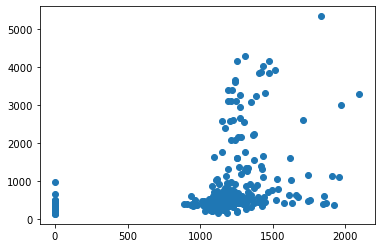

In [138]:
plt.scatter(combined["sat_score"], combined["total_enrollment"])
plt.show()

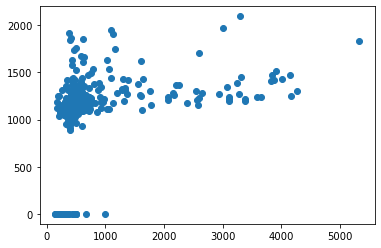

In [139]:
plt.scatter(combined["total_enrollment"],combined["sat_score"])
plt.show()

In [142]:
import numpy as np

In [143]:
# [1,3,5,50]

np.mean([1,3,5,50, ""])

14.75

In [144]:
np.mean([1,3,5,50, 14.75])

14.75

In [145]:
np.mean([25000,22500,35000,500000])

145625.0

In [155]:
combined[(combined["sat_score"]<1000) & (combined["total_enrollment"]<1000)]['SCHOOL NAME']

18                                       MANHATTAN BUSINESS ACADEMY
19                                        BUSINESS OF SPORTS SCHOOL
20                       THE HIGH SCHOOL FOR LANGUAGE AND DIPLOMACY
31                            MANHATTAN ACADEMY FOR ARTS & LANGUAGE
32                      HUDSON HIGH SCHOOL OF LEARNING TECHNOLOGIES
33                        INTERNATIONAL HIGH SCHOOL AT UNION SQUARE
56                      THE URBAN ASSEMBLY SCHOOL FOR GREEN CAREERS
57                                THE GLOBAL LEARNING COLLABORATIVE
59                                        FRANK MCCOURT HIGH SCHOOL
73     COLUMBIA SECONDARY SCHOOL FOR MATH, SCIENCE, AND ENGINEERING
82                        HIGH SCHOOL FOR EXCELLENCE AND INNOVATION
90                              INTERNATIONAL COMMUNITY HIGH SCHOOL
102                     BRONX STUDIO SCHOOL FOR WRITERS AND ARTISTS
108     ANTONIA PANTOJA PREPARATORY ACADEMY, A COLLEGE BOARD SCHOOL
110                                       BRONX 

In [150]:
combined.columns

Index(['DBN', 'SCHOOL NAME', 'Num of SAT Test Takers',
       'SAT Critical Reading Avg. Score', 'SAT Math Avg. Score',
       'SAT Writing Avg. Score', 'sat_score', 'SchoolName', 'AP Test Takers ',
       'Total Exams Taken',
       ...
       'eng_t_11', 'aca_t_11', 'saf_s_11', 'com_s_11', 'eng_s_11', 'aca_s_11',
       'saf_tot_11', 'com_tot_11', 'eng_tot_11', 'aca_tot_11'],
      dtype='object', length=163)